In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes',alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes',alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [5]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [6]:
## normalising the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack( (x, np.reshape(y, (-1,1))) )
transformed_df = pd.DataFrame(data, columns=df.columns)

In [7]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack( (x, np.reshape(y, (-1,1))) )
transformed_df = pd.DataFrame(data, columns=df.columns)

In [8]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.4,random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [10]:
model.evaluate(x_train, y_train)
model.evaluate(x_valid, y_valid)
## before training

7/7 [==============================] - 0s 3ms/step - loss: 0.7369 - accuracy: 0.4700


[0.7369020581245422, 0.4699999988079071]

In [11]:
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_valid,y_valid))

Epoch 1/10
38/38 [==============================] - 1s 6ms/step - loss: 0.6974 - accuracy: 0.5433 - val_loss: 0.6824 - val_accuracy: 0.5600
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6333 - val_loss: 0.6542 - val_accuracy: 0.6650
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.7283 - val_loss: 0.6305 - val_accuracy: 0.7150
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6208 - accuracy: 0.7183 - val_loss: 0.6078 - val_accuracy: 0.7300
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5976 - accuracy: 0.7350 - val_loss: 0.5757 - val_accuracy: 0.7550
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5665 - accuracy: 0.7467 - val_loss: 0.5337 - val_accuracy: 0.7600
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5355 - accuracy: 0.7383 - val_loss: 0.5036 - val_accuracy: 0.7650
Epoch 8/10
38/38 [==

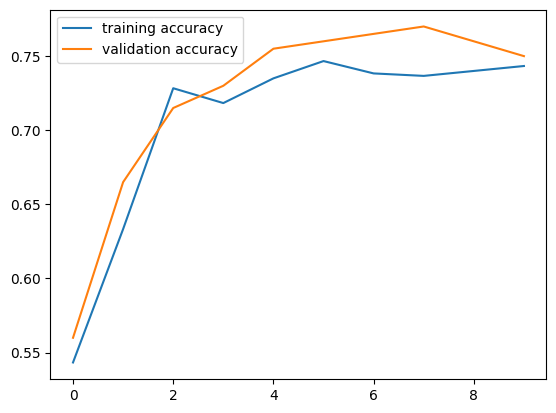

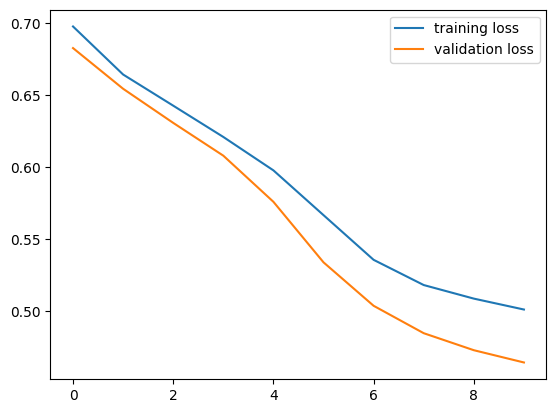

In [12]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [13]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7700


[0.48133254051208496, 0.7699999809265137]